### Import

In [1]:
from camera_calibration import *
import matplotlib.pyplot as plt
from pipeline import *

### Utility

In [8]:
def show_two_images(img, dst, left_title='original image', right_title='undistorted image',
                   left_mode=cv2.COLOR_BGR2RGB, right_mode=cv2.COLOR_BGR2RGB):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    if left_mode:
        ax1.imshow(cv2.cvtColor(img, left_mode))
    else:
        ax1.imshow(img)
    ax1.set_title(left_title, fontsize=50)
    if right_mode:
        ax2.imshow(cv2.cvtColor(dst, right_mode))
    else:
        ax2.imshow(dst, cmap='gray')
    ax2.set_title(right_title, fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)
    
def perspective_transform_result(img, dst, src_points, dst_points,
                                left_mode=cv2.COLOR_BGR2RGB, right_mode=cv2.COLOR_BGR2RGB):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
    f.tight_layout()
    if left_mode:
        ax1.imshow(cv2.cvtColor(img, left_mode))
    else:
        ax1.imshow(img, cmap='gray')
    ax1.plot(src_points[:,0], src_points[:,1], 'r-', lw=5)
    ax1.set_title('undistorted image', fontsize=50)
    if right_mode:
        ax2.imshow(cv2.cvtColor(dst, right_mode))
    else:
        ax2.imshow(dst, cmap='gray')
    ax2.plot(dst_points[:,0], dst_points[:,1], 'r-', lw=5)
    ax2.set_title('warped result', fontsize=50)
    plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

### input and initialization

In [3]:
img = cv2.imread('camera_cal/calibration1.jpg')
img2 = cv2.imread('test_images/test1.jpg')
img3 = cv2.imread('test_images/straight_lines1.jpg')

camera_calibration = CameraCalibration('camera_cal/')
pipeline = Pipeline()

### Camera Calibration

In [4]:
dst = camera_calibration.undistort(img)

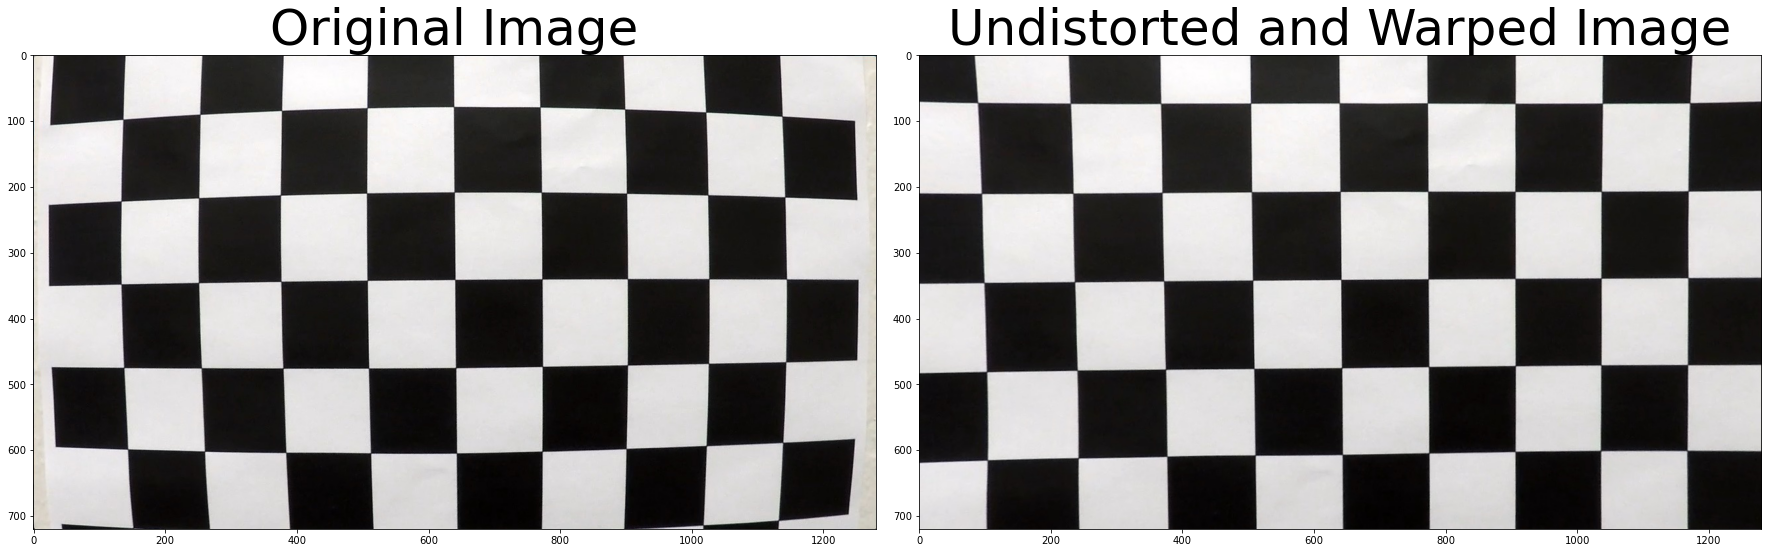

In [15]:
show_two_images(img, dst)

In [17]:
dst2 = camera_calibration.undistort(img2)

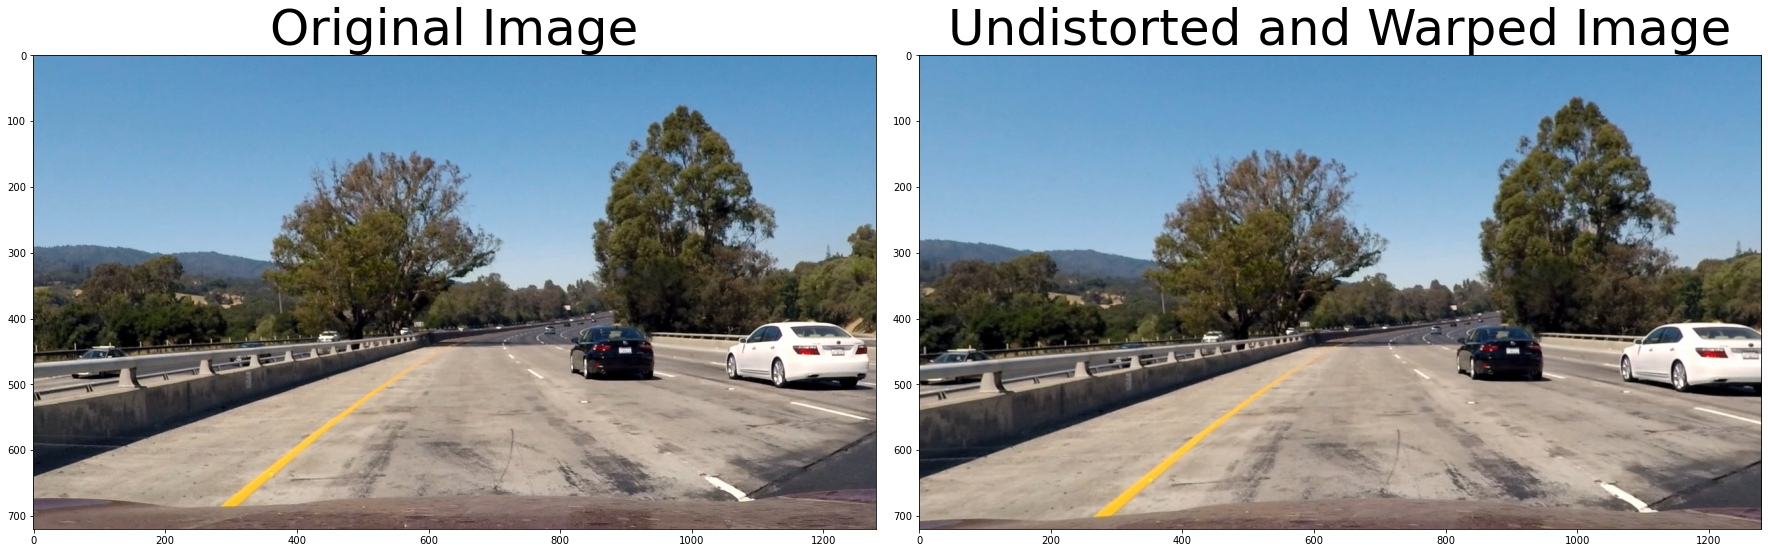

In [18]:
show_two_images(img2, dst2)

### Thresholding

In [6]:
color_binary, mask = pipeline.threshold(img2)

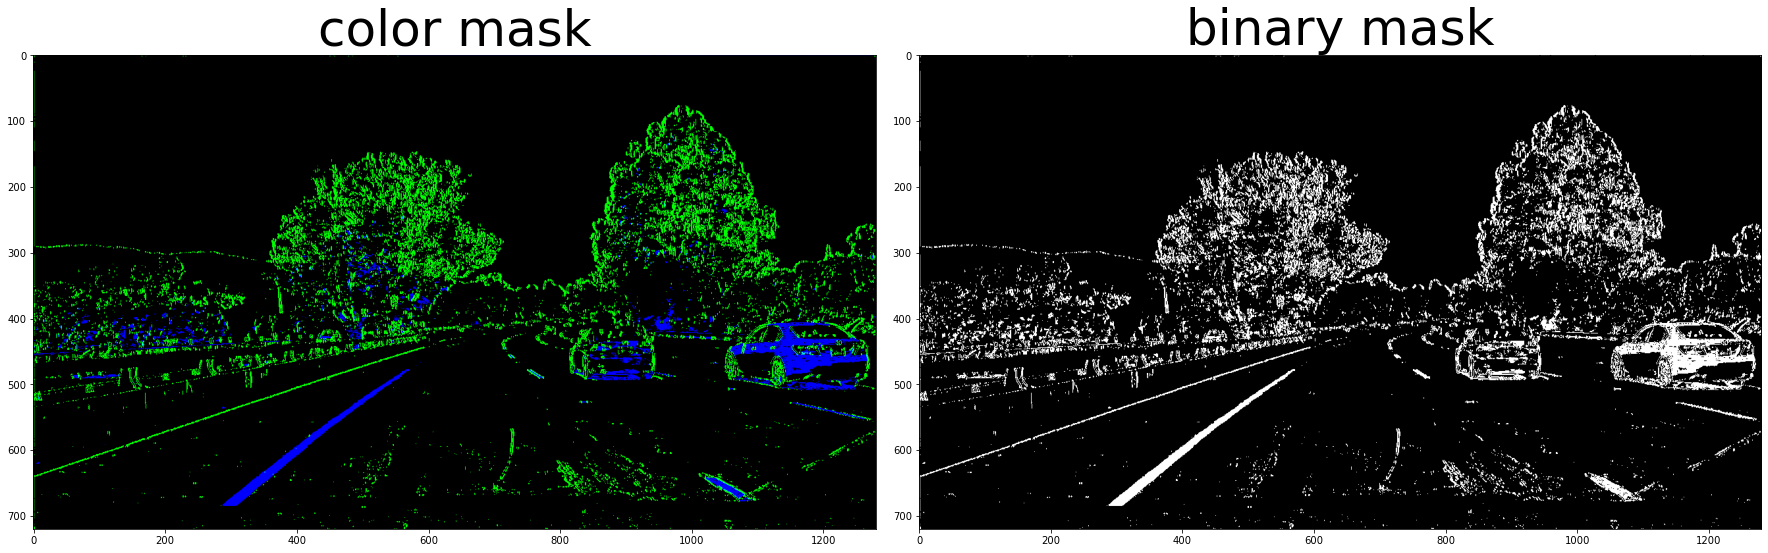

In [16]:
show_two_images(color_binary, mask, 'color mask', 'binary mask', left_mode=None, right_mode=None)

### perspective transform

In [10]:
dst3 = camera_calibration.undistort(img3)
warped3 = pipeline.warp_img(dst3)

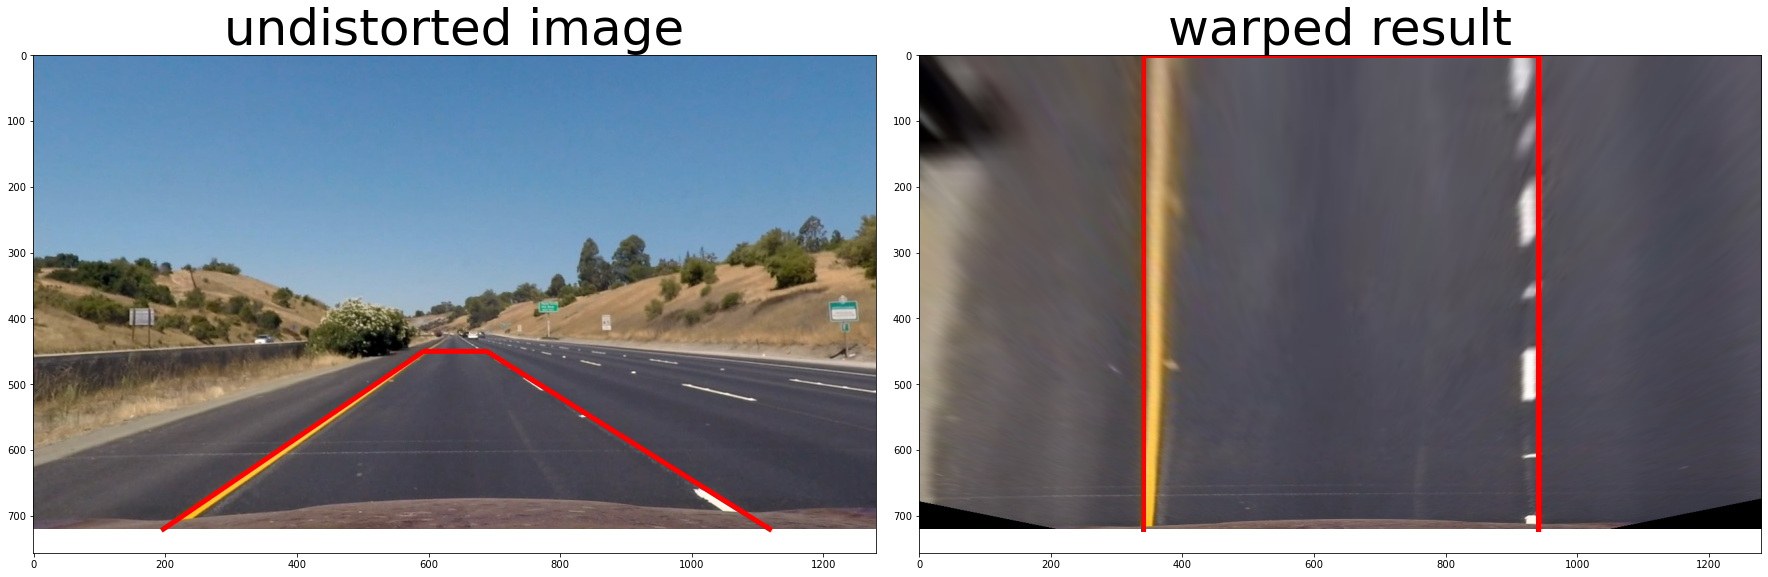

In [11]:
# tune the src and dst points
perspective_transform_result(dst3, warped3, pipeline.perspective_src, pipeline.perspective_dst)

In [12]:
dst2 = camera_calibration.undistort(img2)
color, mask2 = pipeline.threshold(dst2)
warped_mask2 = pipeline.warp_img(mask2)

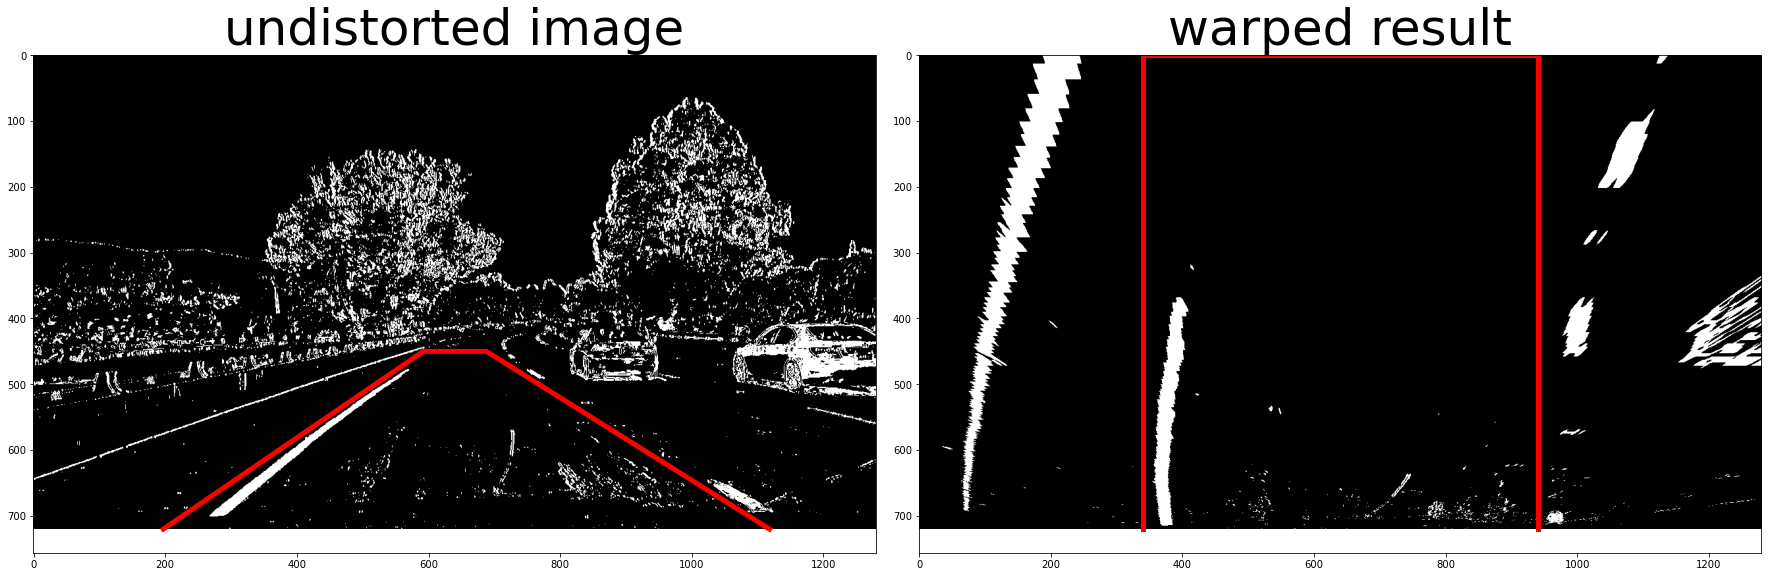

In [14]:
perspective_transform_result(mask2, warped_mask2, pipeline.perspective_src, pipeline.perspective_dst,
                             left_mode=None, right_mode=None)